In [1]:
import numpy as np
import pandas as pd 
import pandas as pd
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings                       
warnings.filterwarnings("ignore")
%matplotlib inline  
sns.set_style('whitegrid')
sns.set_context('notebook')

## Exploring our dataset

In [2]:
#dataset
df = pd.read_csv('../data/advertising.csv')
df


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   Month                     1000 non-null   int32  
 10  Day                       1000 non-null   int32  
 11  Hour                      1000 non-null   int32  
 12  Weekday                   1000 non-null   int32  
 13  Date                      1000 non-null   object 
dtypes: float6

In [41]:
df.shape

(1000, 14)

In [42]:
df.duplicated().sum()

0

In [43]:
df.keys()

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Clicked on Ad', 'Month', 'Day', 'Hour', 'Weekday', 'Date'],
      dtype='object')

In [44]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Clicked on Ad               0
Month                       0
Day                         0
Hour                        0
Weekday                     0
Date                        0
dtype: int64

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00
Month,1000.0,3.81700,1.926973,1.00,2.0000,4.000,5.0000,7.00
Day,1000.0,15.48400,8.734073,1.00,8.0000,15.000,23.0000,31.00
Hour,1000.0,11.66000,6.960952,0.00,6.0000,12.000,18.0000,23.00
Weekday,1000.0,3.06400,1.998474,0.00,1.0000,3.000,5.0000,6.00


In [46]:
#Finding numnerical and categorical columns in the file

categoric = 0
numeric = 0
for columns in df.columns:
    if df[columns].dtype == 'object':
        categoric += 1
        print(f'{columns}:  Categorical')
    else:
        numeric += 1
        print(f'{columns}: Numeric')
          
print('Total categorical: 'f'{categoric}')
print('Total Numeric: 'f'{numeric}')


Daily Time Spent on Site: Numeric
Age: Numeric
Area Income: Numeric
Daily Internet Usage: Numeric
Ad Topic Line:  Categorical
City:  Categorical
Male: Numeric
Country:  Categorical
Clicked on Ad: Numeric
Month: Numeric
Day: Numeric
Hour: Numeric
Weekday: Numeric
Date:  Categorical
Total categorical: 4
Total Numeric: 10


In [47]:
obj_column = df.dtypes[df.dtypes == 'object'].index
for i in range(0, len(obj_column)) :
    print(obj_column[i])
    print(len(df[obj_column[i]].unique()))
    print()

Ad Topic Line
1000

City
969

Country
237

Date
203



In [48]:
qual_cols = set(df.select_dtypes(include = ['object']).columns)
print(f'Qualitative Variables: {qual_cols}')

#removing the timestamp as it is numeric or Qualitative variable 
qual_cols = qual_cols - {'Timestamp'}
print(f'Qualitative Variables: {qual_cols}')



Qualitative Variables: {'Date', 'Ad Topic Line', 'City', 'Country'}
Qualitative Variables: {'Date', 'Ad Topic Line', 'City', 'Country'}


In [49]:
quant_cols = set(df.columns) - set(qual_cols)
print(f'Quantitative Variables: {quant_cols}')

Quantitative Variables: {'Hour', 'Day', 'Male', 'Area Income', 'Weekday', 'Daily Internet Usage', 'Age', 'Daily Time Spent on Site', 'Clicked on Ad', 'Month'}


In [72]:
# Extracting the datetime variables using timestamp column

df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
df['Month'] = df['Timestamp'].dt.month 
df['Day'] = df['Timestamp'].dt.day     
df['Hour'] = df['Timestamp'].dt.hour   
df["Weekday"] = df['Timestamp'].dt.dayofweek 

df['Date'] = df['Timestamp'].apply(lambda t : t.date())
df = df.drop(['Timestamp'], axis=1) # deleting timestamp
df

   Other_Column  Month  Day  Hour  Weekday        Date
0             1      1    1     8        6  2023-01-01
1             2      1    1    12        6  2023-01-01
2             3      1    2    14        0  2023-01-02


## visualizing our dataset

In [73]:
px.histogram(df,x='Daily Time Spent on Site', 
             color='Clicked on Ad',
             template="none",
             color_discrete_sequence= px.colors.sequential.Darkmint)

# 0 and 1, where 0 refers to a user who didn't click the advertisement, while one 
#refers to the scenario where a user clicks the ad.

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Other_Column', 'Month', 'Day', 'Hour', 'Weekday', 'Date'] but received: Daily Time Spent on Site

### Daily Time Spent on Site by gender

In [ ]:
px.histogram(df,x='Daily Time Spent on Site', 
             color='Male',
             template="none",
             color_discrete_sequence= px.colors.sequential.Darkmint)


### top city with daily time

In [ ]:
city_dailytime=pd.DataFrame(df.groupby('City')['Daily Time Spent on Site'].mean().sort_values(ascending=False)[:20])
city_dailytime=city_dailytime.rename_axis(['City']).reset_index()
city_dailytime
px.bar(city_dailytime, x='City', y='Daily Time Spent on Site',template="none",color_discrete_sequence= px.colors.sequential.Redor)

### top country with daily time

In [ ]:
city_dailytime=pd.DataFrame(df.groupby('Country')['Daily Time Spent on Site'].mean().sort_values(ascending=False)[:20])
city_dailytime=city_dailytime.rename_axis(['Country']).reset_index()
city_dailytime
px.bar(city_dailytime, x='Country', y='Daily Time Spent on Site',template="none",color_discrete_sequence= px.colors.sequential.Magenta)

### top country with area income 


In [ ]:
#top country with area income 
city_areaincome=pd.DataFrame(df.groupby('Country')['Area Income'].mean().sort_values(ascending=False)[:20])
city_areaincome=city_areaincome.rename_axis(['Country']).reset_index()
city_areaincome
px.bar(city_areaincome, x='Country', y='Area Income',template="none",color_discrete_sequence= px.colors.sequential.Blugrn)

### top city with area income 

In [51]:
city_areaincome=pd.DataFrame(df.groupby('City')['Area Income'].mean().sort_values(ascending=False)[:20])
city_areaincome=city_areaincome.rename_axis(['City']).reset_index()
city_areaincome
px.bar(city_areaincome, x='City', y='Area Income',template="none",color_discrete_sequence= px.colors.sequential.Burg)

In [52]:
df.groupby('Country')['Clicked on Ad'].count().sort_values(ascending=False)

Country
France                   9
Czech Republic           9
Afghanistan              8
Australia                8
Turkey                   8
                        ..
Montserrat               1
Mozambique               1
Romania                  1
Saint Kitts and Nevis    1
Aruba                    1
Name: Clicked on Ad, Length: 237, dtype: int64

In [53]:
# Maximum number of internet users belonging to which country in the given dataset for both male and female

result = pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(by=1, ascending=False).head(10)
result

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [54]:
# Maximum number of internet users belong to which country in the given dataset?

pd.crosstab(index=df['Country'],columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


### top 12 country's ad click based on gender 

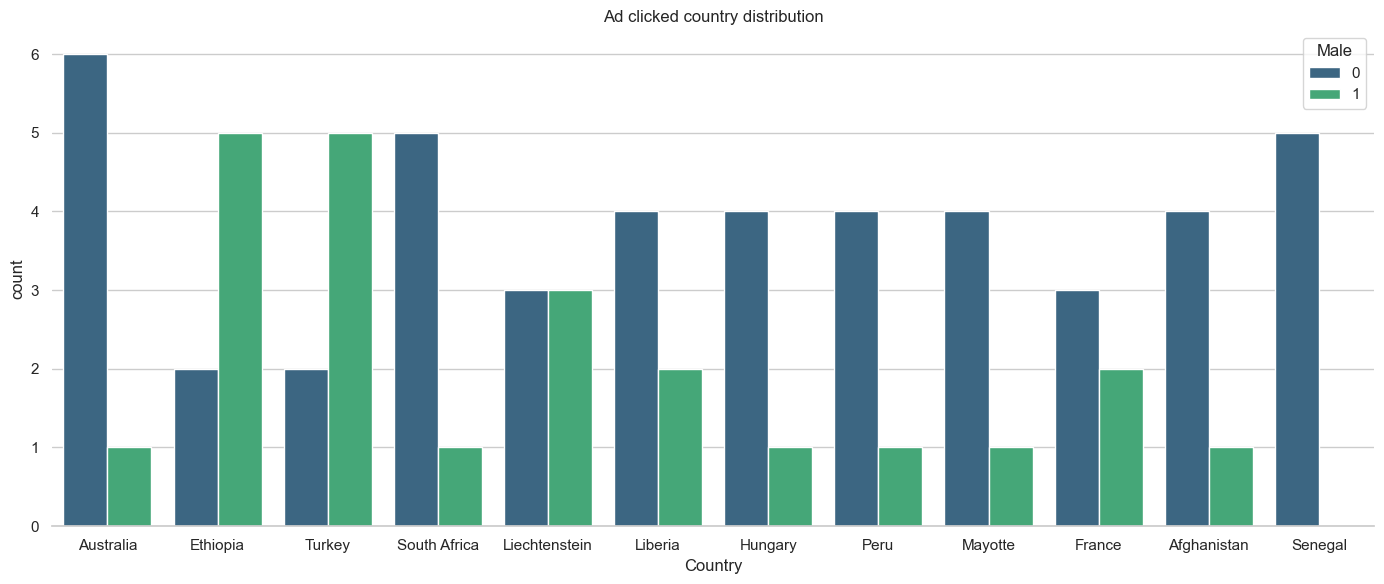

In [55]:
#top 12 country's ad click based on gender 

plt.figure(figsize=(14,6))
sns.countplot(x='Country',data=df[df['Clicked on Ad']==1],order=df[df['Clicked on Ad']==1]['Country'].value_counts().index[:12],hue='Male',
              palette='viridis')
plt.title('Ad clicked country distribution')
plt.tight_layout()
sns.despine(left=True)

### daily distribution of ad click based on gender 

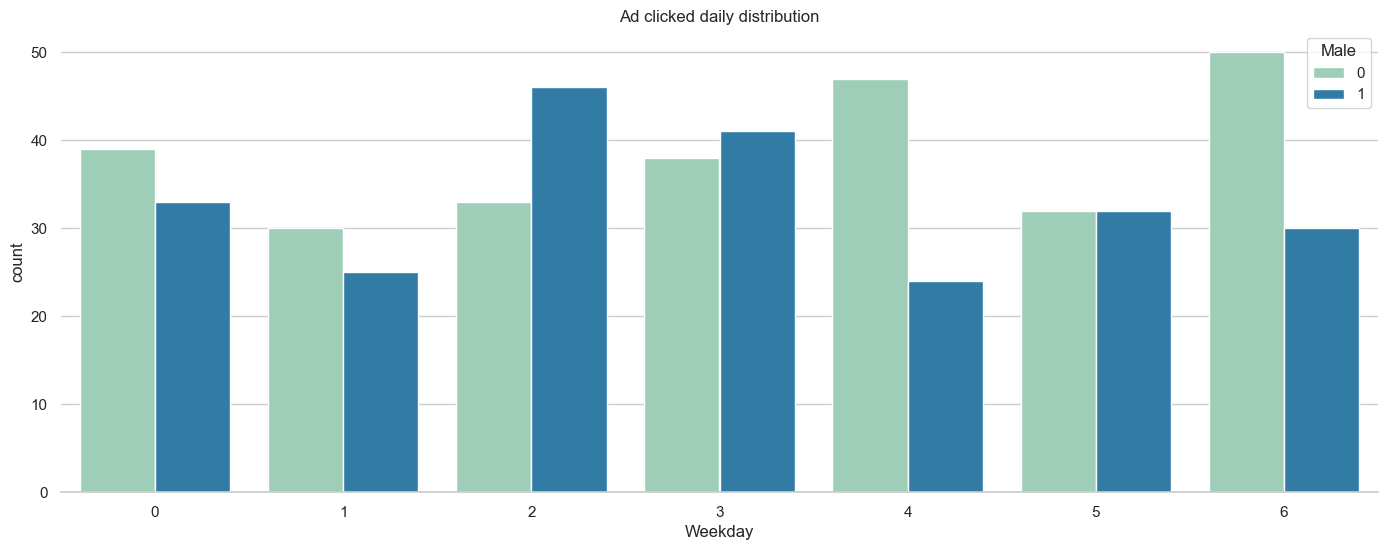

In [56]:
#daily distribution of ad click based on gender 

plt.figure(figsize=(17,6))
sns.countplot(x='Weekday',data=df[df['Clicked on Ad']==1],hue='Male',palette='YlGnBu')
plt.title('Ad clicked daily distribution')
sns.despine(left=True)

### Comparison of users who have clicked on an ad or not in terms of age and weekday. People of higher age tend to click on an ad.

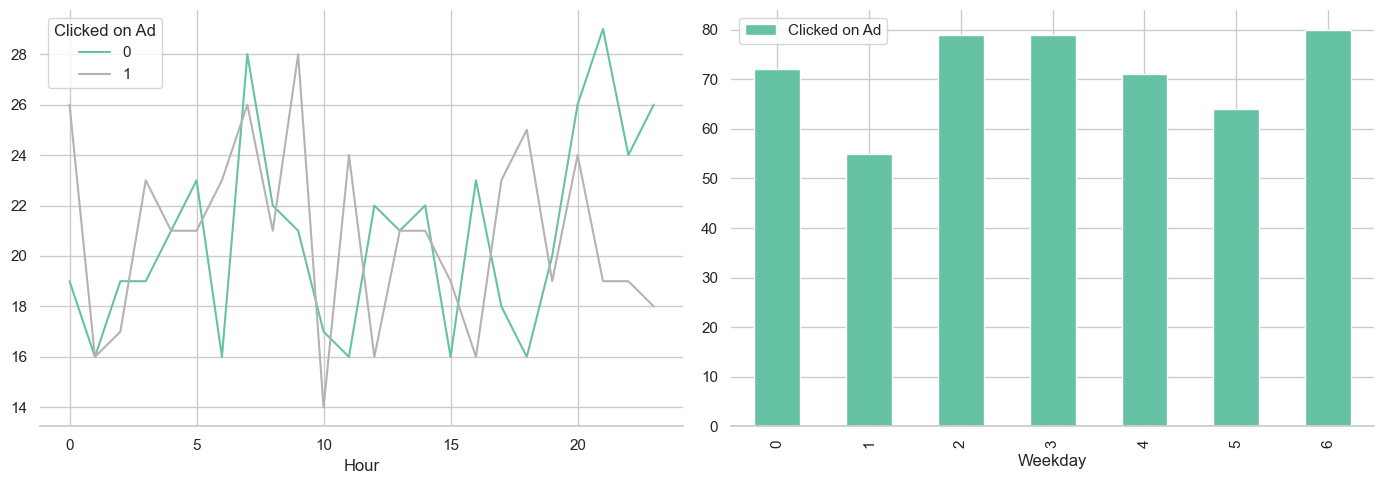

In [57]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0],cmap='Set2')
pd.pivot_table(df, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1],cmap='Set2') # 0 - Monday
plt.tight_layout()
sns.despine(left=True)
plt.show()

- The line chart here indicates that users tend to click on an Ad later in the day or probably early in the morning.

- It is expected based on the age feature that most people are working, so it seems appropriate as they either find time early or late in the day. 
- Also, Sunday seems to be effective for clicking on an ad from the bar chart.

### Monthly distribution of ad clicks

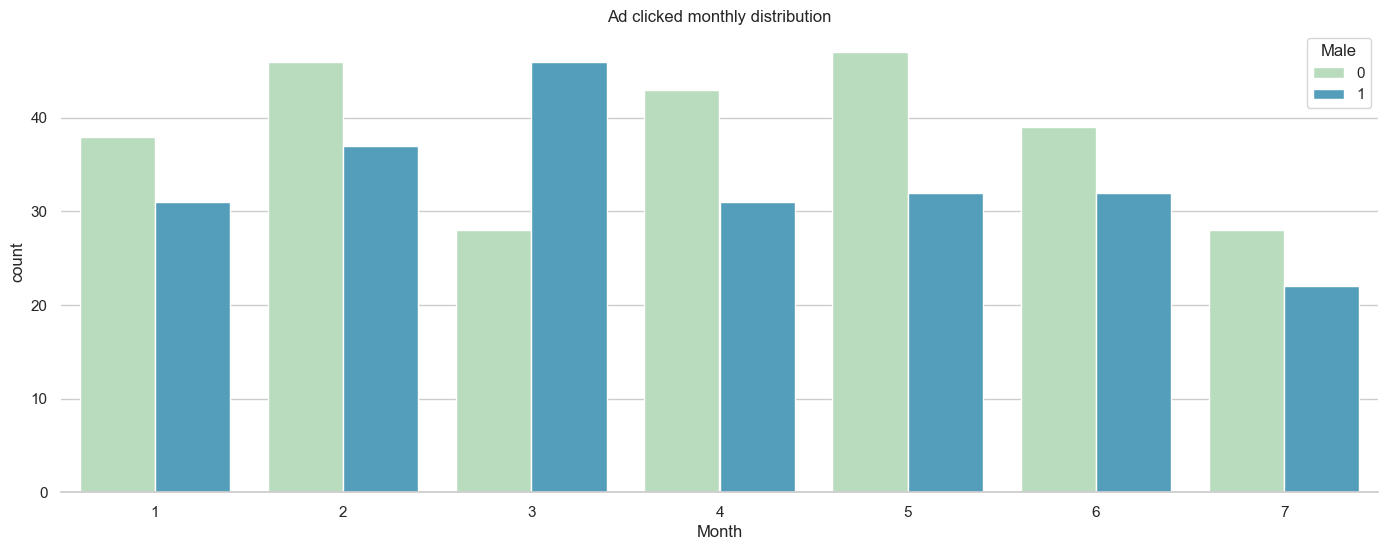

In [58]:
plt.figure(figsize=(17,6))
sns.countplot(x='Month',data=df[df['Clicked on Ad']==1],hue='Male',palette='GnBu')
plt.title('Ad clicked monthly distribution')
sns.despine(left=True)

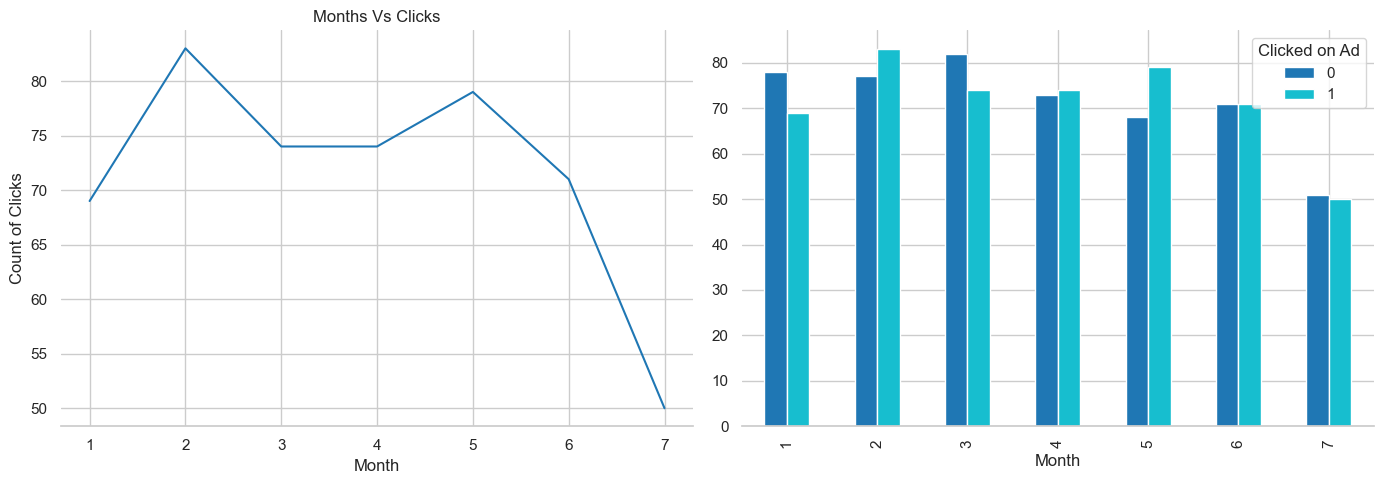

In [59]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0],cmap = "tab10")
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"]).T.plot(kind = 'bar',ax=ax[1],cmap = "tab10")
#df.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
sns.despine(left=True)
plt.show()

- Line chart showing the count of clicks for each month.
- Grouped bar chart shows the distribution of the target variable across seven months.
- ```2nd``` Month seems to be the best for clicking on an Ad.

### top ad clicked on specific date

In [60]:
df[df['Clicked on Ad']==1]['Date'].value_counts().head(5)

#14th of FEB was the top day for ad clicked 

Date
2016-02-14    8
2016-05-31    7
2016-01-05    6
2016-02-17    6
2016-04-04    6
Name: count, dtype: int64

### Frequent words used in the ad topic line 

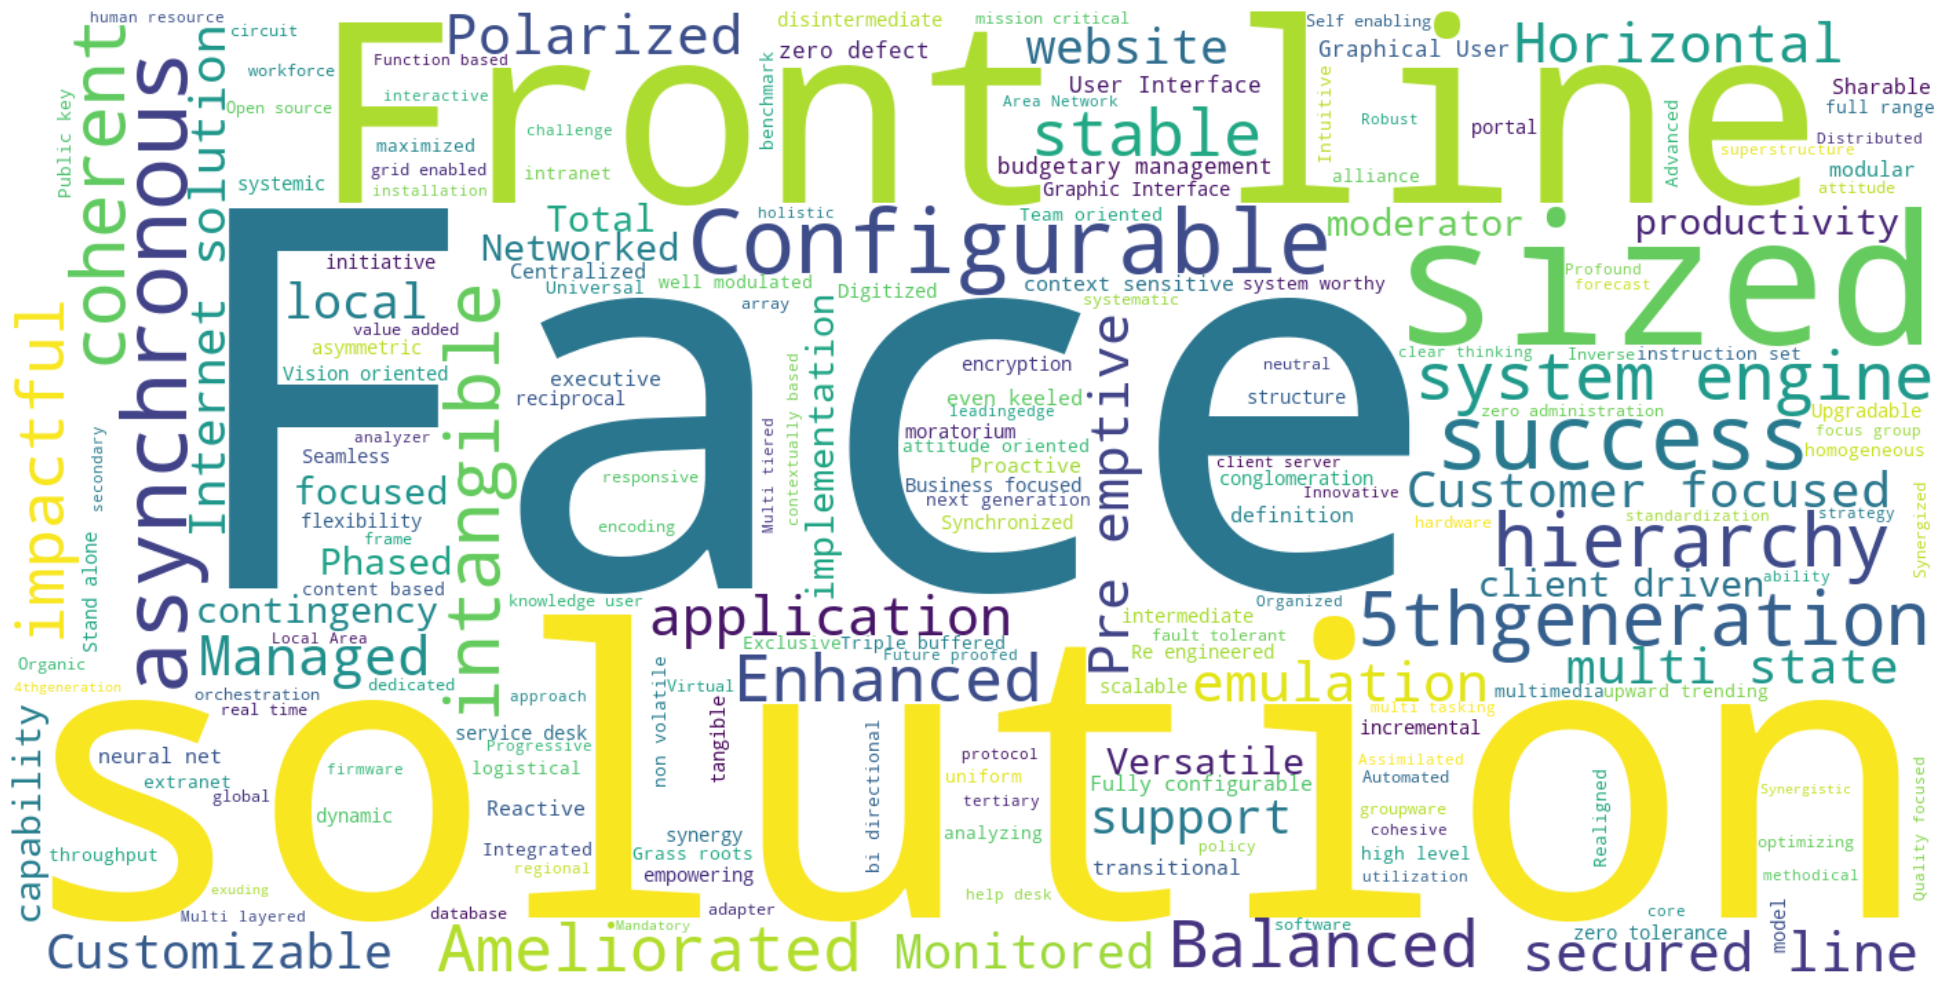

In [61]:
text = ' '.join(topic_line for topic_line in df['Ad Topic Line'])
world_cloud = WordCloud(width=1400, height=700,background_color='white').generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [62]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday,Date
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6,2016-03-27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0,2016-04-04
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6,2016-03-13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6,2016-01-10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4,2016-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,2,11,21,3,2016-02-11
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,4,22,2,4,2016-04-22
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,2,1,17,0,2016-02-01
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,3,24,2,3,2016-03-24


### pairplot for all the variable to see relationship between them 

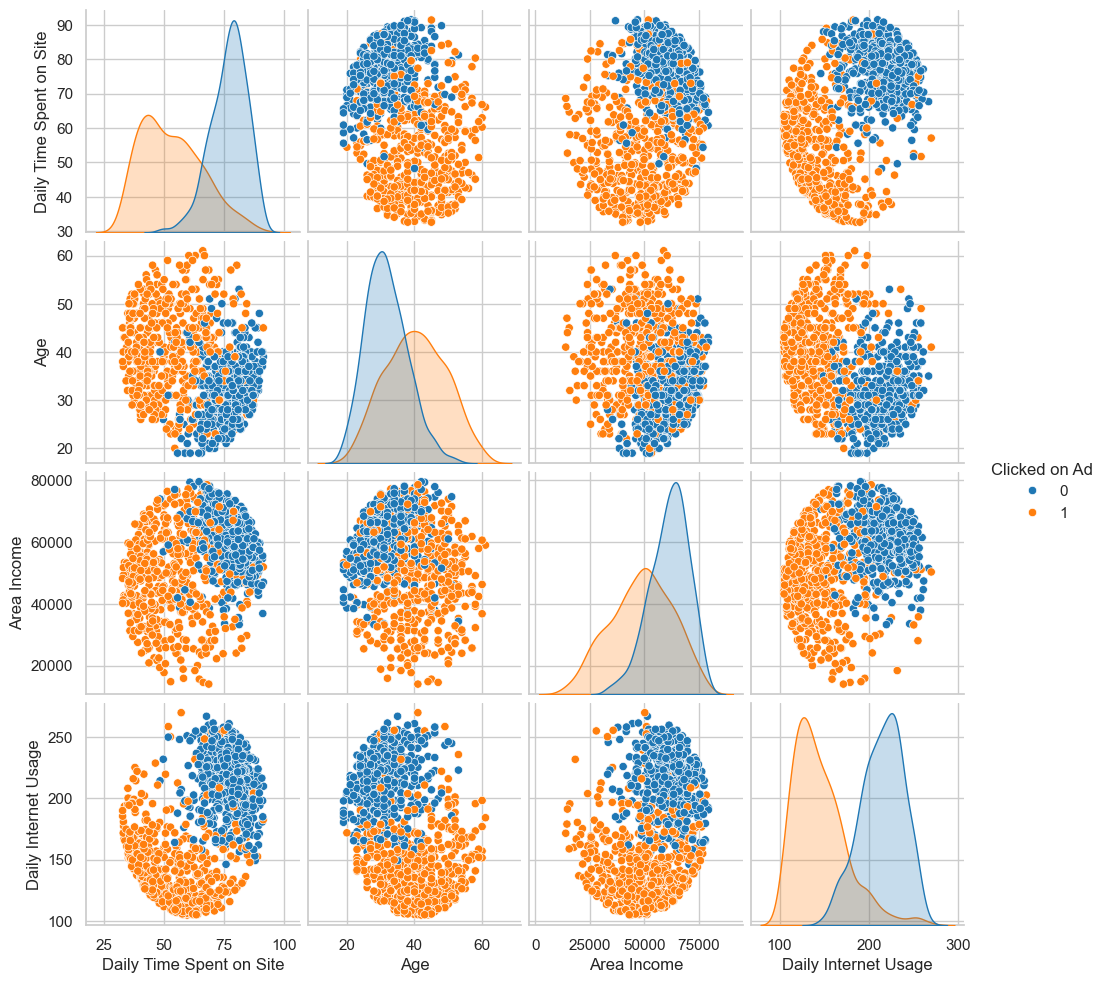

In [63]:
sns.pairplot(df, hue= "Clicked on Ad", vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])

- All of the variables bear no correlation to each other! 
- Each univariate distribution shows apparent differences in kurtosis and means between people who clicked on an ad and those who did not. 
- All the pair plots also indicate clear clumping between the two groups.
- People that do not click on ads seem to follow more precise patterns. 
- People that did not click on ads seem to be less tightly clumped. 
- It would seem that larger kurtosis values could be attributed to people that did not click on an ad, backing up the previous statement. 

### joint plot for age and daily time spent

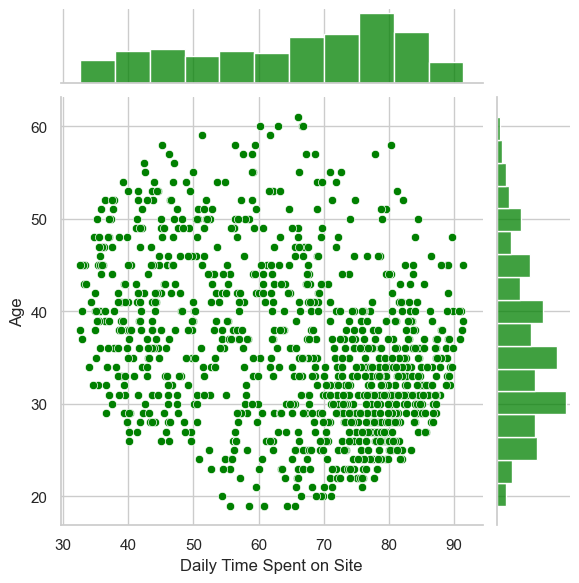

In [64]:
sns.jointplot(data=df, x="Daily Time Spent on Site", y="Age", color='green')
plt.show()

### kernel density(kde) plot with shading

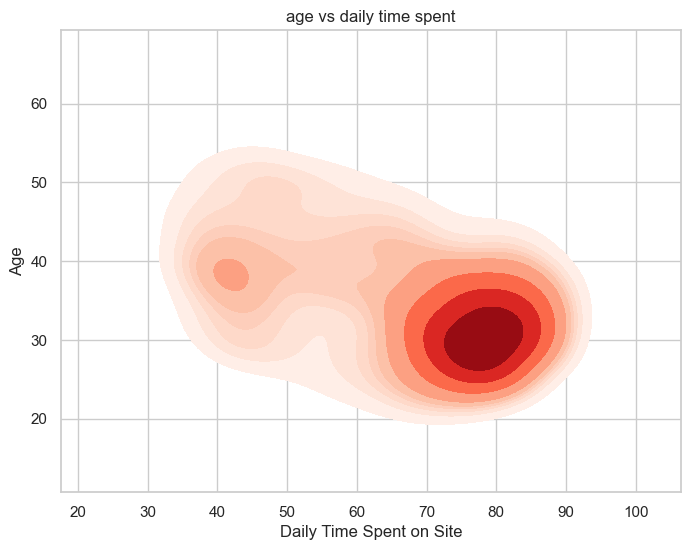

In [65]:
plt.figure(figsize=(8, 6))

# Creating a kernel density plot with shading and specifying the colormap with cmap
sns.kdeplot(
    data=df,
    x="Daily Time Spent on Site",
    y="Age",
    cmap="Reds",
    fill=True,  
    thresh=0.15,  
)
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Age")
plt.title("age vs daily time spent")

plt.show()


- From the picture, we can conclude that younger users spend more time on the site. 
- This implies that users between 20 and 40 years can be the leading target group for the marketing campaign. 
- Hypothetically, if we have a product intended for middle-aged people, this is the right site for advertising. 
- Conversely, if we have a product designed for people over 60, it would be a mistake to advertise on this site.

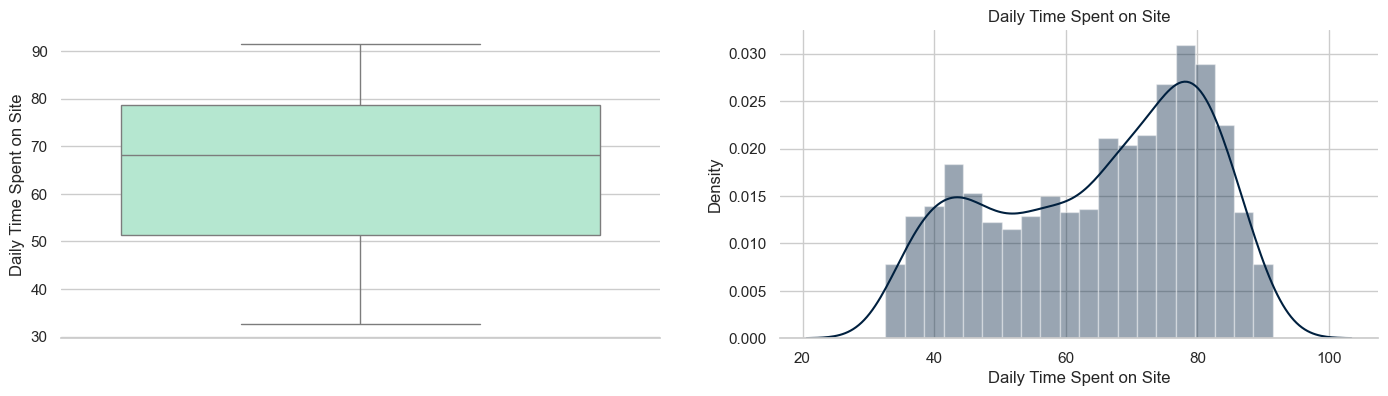

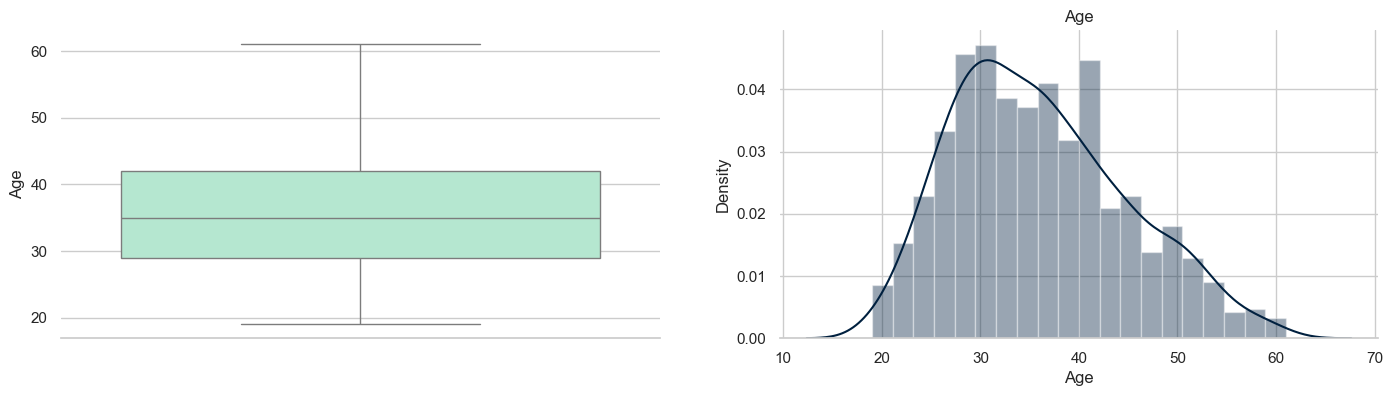

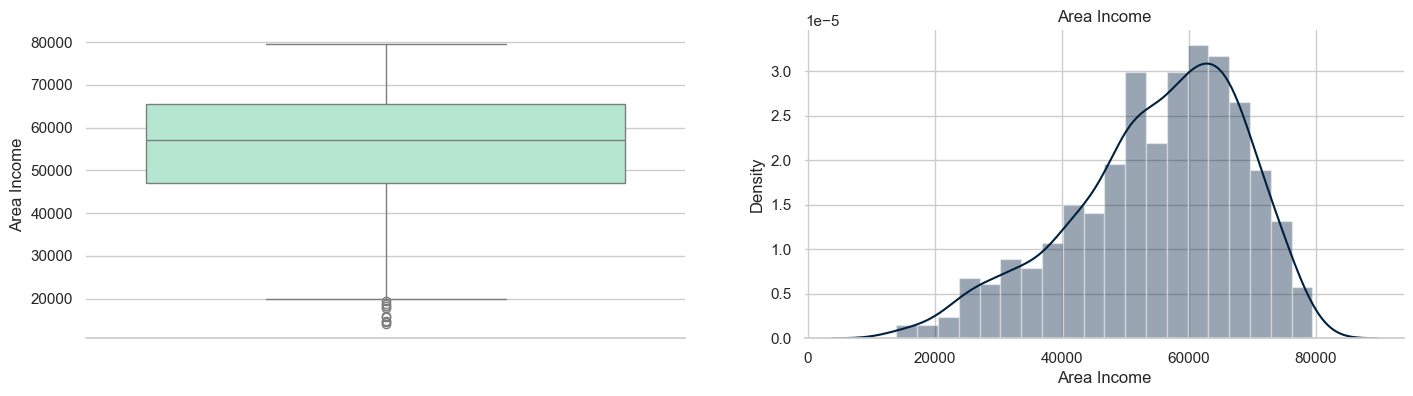

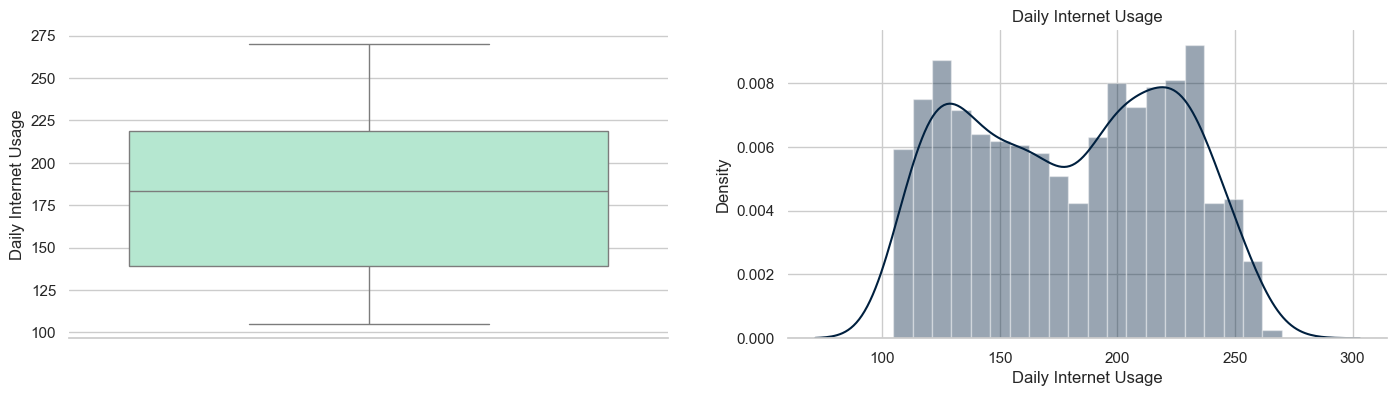

In [66]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (17, 4))
    plt.subplot(1,2,1)
    sns.boxplot(df[i],color="#ADEFD1FF")
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 20,color="#00203FFF")    
    plt.title(i)   
    sns.despine(left=True)
    plt.show()

- We can see that daily internet usage and daily time spent on a site has two peaks (Bi-model in statistical terms).
- It indicates that there are two different groups present in our data. 
- We don't expect the users to be generally distributed as people spend more time on the internet/website and people who spend less time.
- Some regularly use the website and some less often, so they are perfectly all right.

### Age distribution

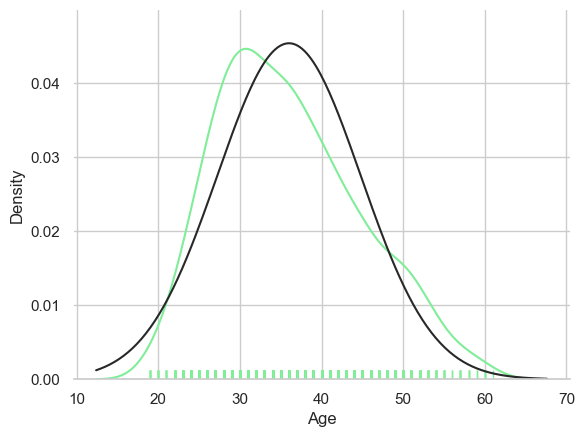

In [67]:
from scipy.stats import norm
sns.distplot(df['Age'], hist=False, color='#80ED99', rug=True, fit=norm);
sns.despine(left=True)

In [68]:
print('oldest person was of:', df['Age'].max(), 'Years')
print('Youngest person was of:', df['Age'].min(), 'Years')
print('Average age was of:', df['Age'].mean(), 'Years')

oldest person was of: 61 Years
Youngest person was of: 19 Years
Average age was of: 36.009 Years


### Clicked vs non Clicked 

In [69]:
columns_to_mean = ['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
result = df.groupby('Clicked on Ad')[columns_to_mean].mean()
result

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


### Average profile of a user who will click on a ad or not.

In [70]:
df.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


### corelation between variables

<Axes: >

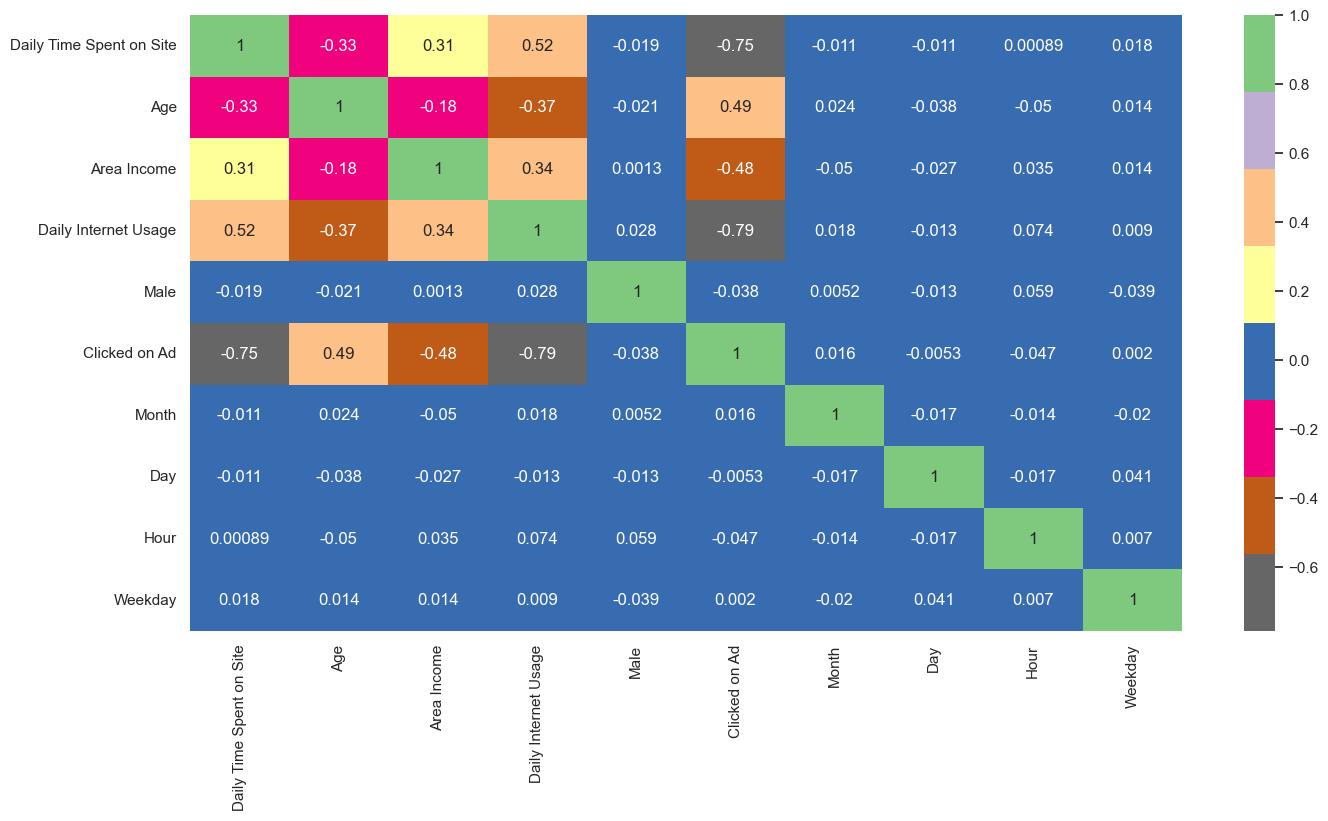

In [71]:
numeric_columns = df.select_dtypes(include=['number'])  # Selecting only numeric columns
fig = plt.figure(figsize=(16, 8))
sns.heatmap(numeric_columns.corr(), cmap='Accent_r', annot=True)
